# Kaggle Titanic Challenge
****

In [ ]:
# JupyterLite setup. Ignore this cell if you are running on Jupyter Notebook or JupyterLab.
import sys
try:
    if "pyodide" in sys.modules:
        import piplite
        await piplite.install('seaborn')
except:
    print("piplite not found, ignore this if you are not using Jupyterlite") 

In [401]:
import pandas as pd

# load dataset titanic
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### Variable Notes
   - **PassengerId** Unique ID of the passenger

   - **Survived** Survived (1) or died (0)

   - **Pclass** Passenger's class (1st, 2nd, or 3rd)

   - **Name** Passenger's name

   - **Sex** Passenger's sex

   - **age** Passenger's age

   - **SibSp** Number of siblings/spouses aboard the Titanic

   - **Parch** Number of parents/children aboard the Titanic

   - **Ticket** Ticket number

   - **Fare** Fare paid for ticket

   - **Cabin** Cabin number

   - **Embarked** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)

In [402]:
# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n=================================")
print(f"DataFrame info : {titanic_df.info()}\n=================================")
print(f"DataFrame columns : {titanic_df.columns}\n=================================")
print(f"The type of each column : {titanic_df.dtypes}\n=================================")
print(f"How much missing value in every column : {titanic_df.isna().sum()}\n=================================")

DataFrame shape : (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
DataFrame info : None
DataFrame columns : Index(['s

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (ages, Gender, Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

# 1. Who were the passengers on the titanic?

In [403]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
plt.style.use("fivethirtyeight")

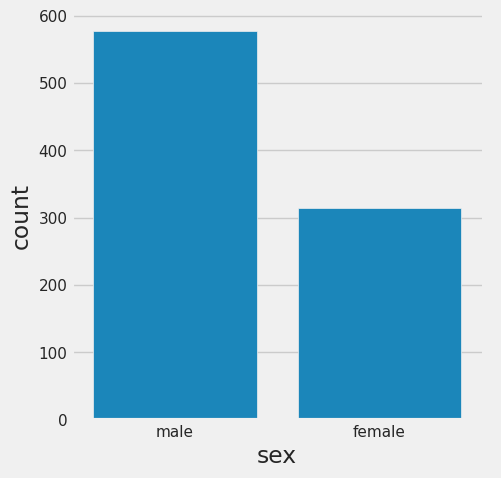

In [404]:
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='sex', data=titanic_df, kind='count')

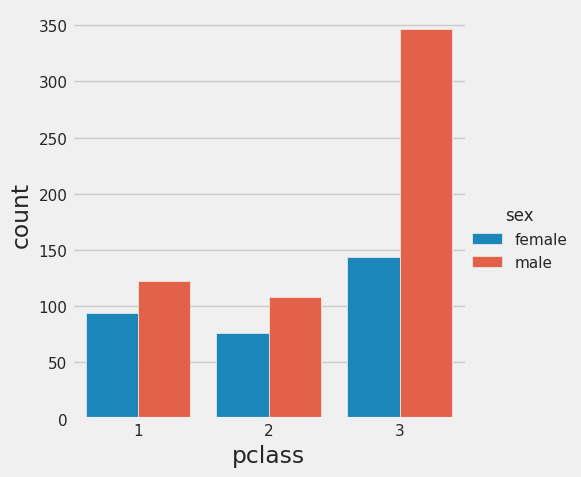

In [405]:
# Now let separate the gender by classes passing 'sex' to the 'hue' parameter
sns.catplot(x='pclass', data=titanic_df, hue='sex', kind='count')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males, females, and children. How can we go about this?

In [406]:
# Create a new column 'Person' in which every person under 16 is child.

titanic_df['Person'] = titanic_df.sex
titanic_df.loc[titanic_df['age'] < 16, 'Person'] = 'Child'

In [407]:
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n=================================")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=================================")
print(f"Mean age : {titanic_df.age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


Excellent! Now we have seperated the passengers between female, male, and child. This will be important later on beacuse of the famous **"Women and children first policy"**!

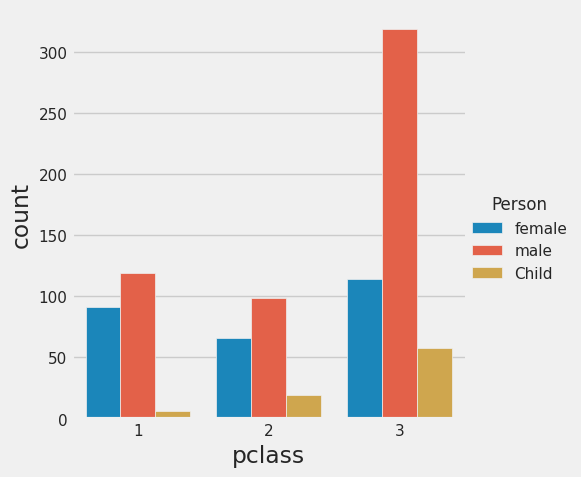

In [408]:
sns.catplot(x='pclass', data=titanic_df, hue='Person', kind='count')

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

<Axes: >

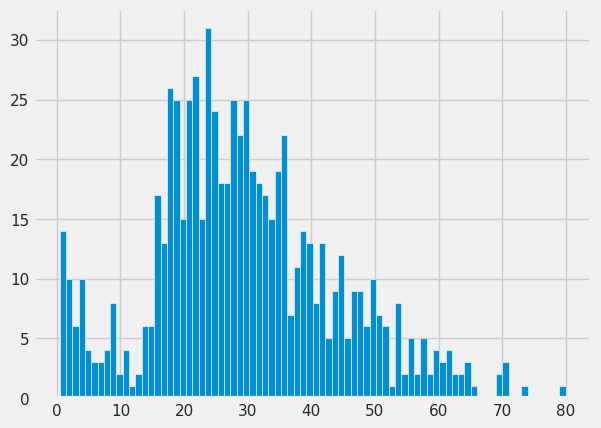

In [409]:
# visualizing age distribution
titanic_df.age.hist(bins=80)

/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


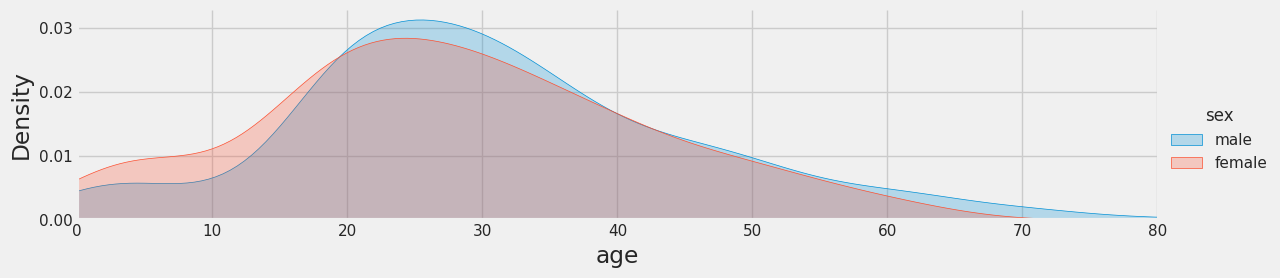

In [410]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


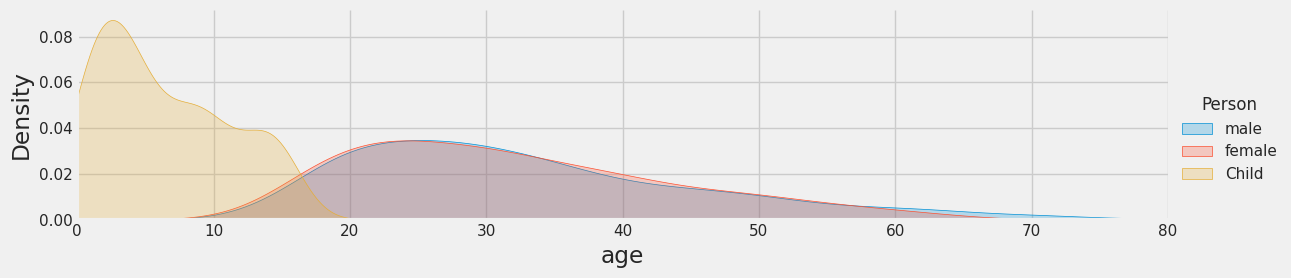

In [411]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/pedro/anaconda3/envs/livedocs_workshop_tutorial/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


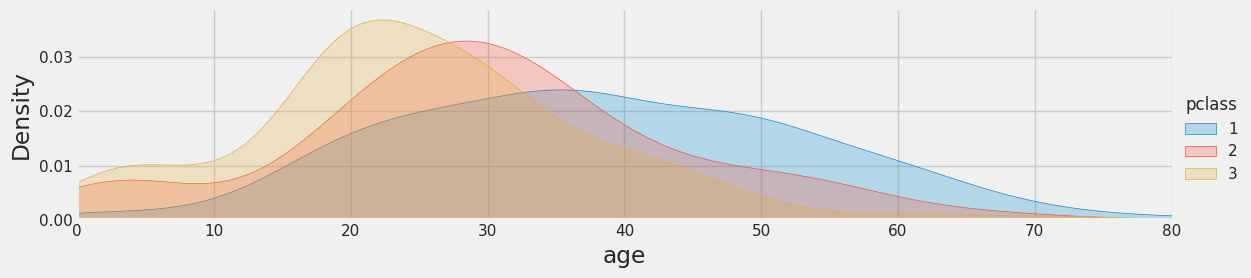

In [412]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue="pclass",aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic_df['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

# 2. What deck were the passengers on and how does that relate to their class?

In [413]:
# visualizing the dataset again
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Person  
0    man        True  NaN  Southampton    no  False    male  
1  woman       False    C    Cherbourg   yes  False  female  
2  woman       False  NaN  Southampton   yes   True  female  
3  woman       False    C  Southampton   yes  False  female  
4    man        True  NaN  Southampton    no   True    male

So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [414]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['deck'].dropna()
deck

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: deck, Length: 203, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Notice we only need the first letter of the deck to classify its level (e.g. A, B, C, D, E, F, G)

/tmp/ipykernel_782220/1128683687.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')


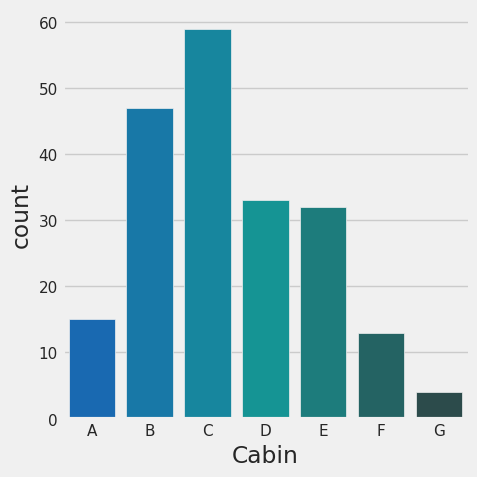

In [415]:
# let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we  can drop it out with the following code:

/tmp/ipykernel_782220/28779719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')


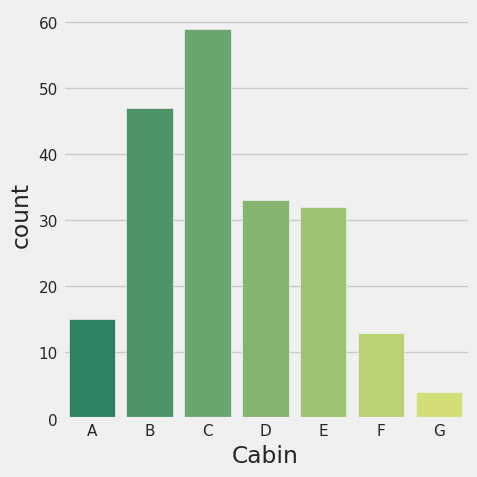

In [416]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin_df, kind='count', palette='summer')

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question.

# 3. Where did the passengers come from?

In [417]:
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Person  
0    man        True  NaN  Southampton    no  False    male  
1  woman       False    C    Cherbourg   yes  False  female  
2  woman       False  NaN  Southampton   yes   True  female  
3  woman       False    C  Southampton   yes  False  female  
4    man        True  NaN  Southampton    no   True    male

Note here that the Embarked column has C, Q, and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

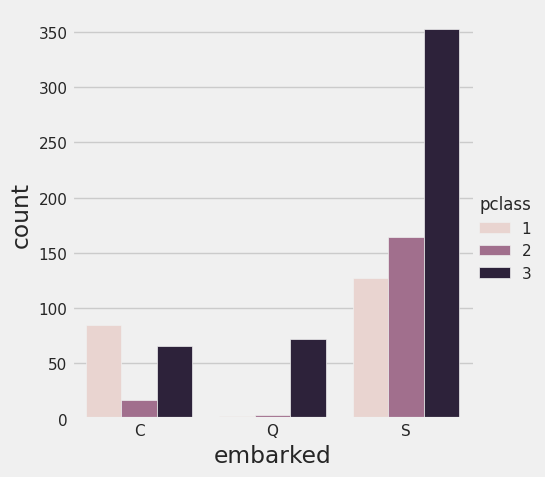

In [418]:
# Now we can make a quick factorplot to check out the results, note the 
# order argument, used to deal with NaN values

sns.catplot(x='embarked', data=titanic_df, hue='pclass', kind='count', order=['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

# 4. Who was alone and who was with family?

In [419]:
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Person  
0    man        True  NaN  Southampton    no  False    male  
1  woman       False    C    Cherbourg   yes  False  female  
2  woman       False  NaN  Southampton   yes   True  female  
3  woman       False    C  Southampton   yes  False  female  
4    man        True  NaN  Southampton    no   True    male

In [420]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column

titanic_df['alone'] = titanic_df.alone
titanic_df.alone

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: alone, Length: 891, dtype: bool

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [421]:
# Look for > 0 or == 0 to set alone status
titanic_df.loc[titanic_df['alone'] > 0, 'alone'] = 'with Family'
titanic_df.loc[titanic_df['alone'] == 0, 'alone'] = 'Alone'

/tmp/ipykernel_782220/2128997389.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'with Family' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  titanic_df.loc[titanic_df['alone'] > 0, 'alone'] = 'with Family'


In [422]:
# Let's check to make sure it worked
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive        alone  Person  
0    man        True  NaN  Southampton    no        Alone    male  
1  woman       False    C    Cherbourg   yes        Alone  female  
2  woman       False  NaN  Southampton   yes  with Family  female  
3  woman       False    C  Southampton   yes        Alone  female  
4    man        True  NaN  Southampton    no  with Family    male

/tmp/ipykernel_782220/833145440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='alone', data=titanic_df, kind='count', palette='Blues',


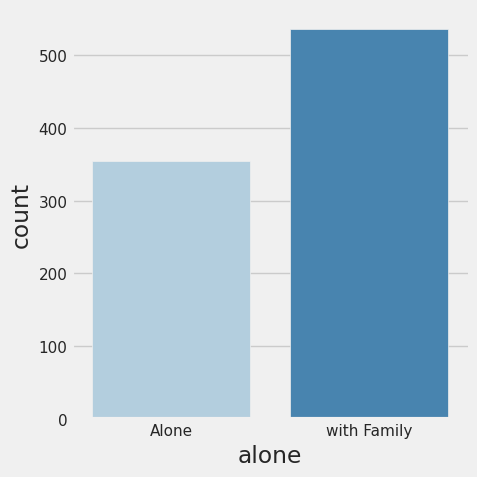

In [423]:
# Now let's get a simple visualization!
sns.catplot(x='alone', data=titanic_df, kind='count', palette='Blues', 
            order=['Alone', 'with Family'])

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

# 5. What factors helped someone survive the sinking?

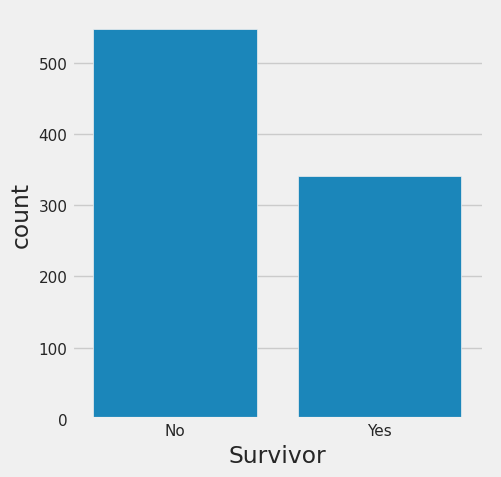

In [424]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.survived.map({0:'No', 1:'Yes'})

# Let's just get a quick overall view of survied vs died. 
sns.catplot(x='Survivor', data=titanic_df, kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

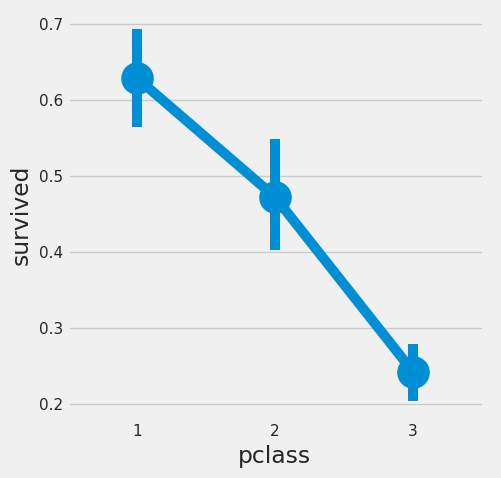

In [425]:
# Let's use a factor plot again, but now considering class
sns.catplot(x='pclass', y='survived', data=titanic_df, kind='point')

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

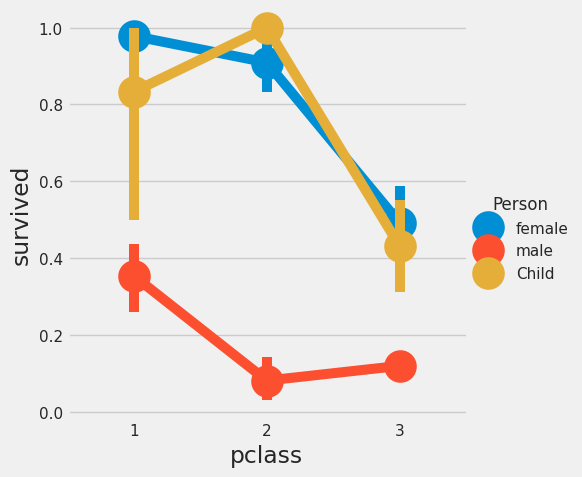

In [426]:
# Let's use a factor plot again, but now considering class and gender
sns.catplot(x='pclass', y='survived', data=titanic_df, hue='Person', kind='point')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

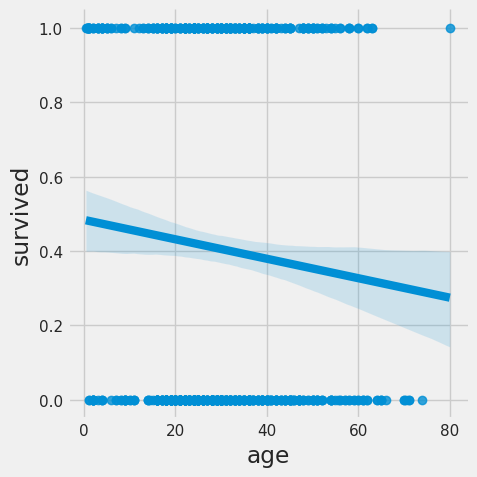

In [427]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='age', y='survived', data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

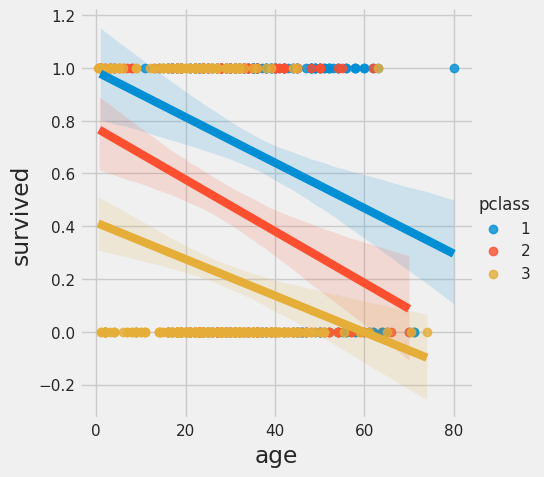

In [428]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='age', y='survived',hue='pclass', data=titanic_df)

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

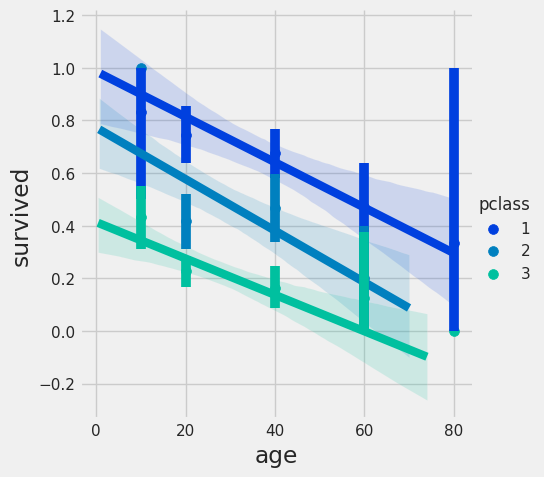

In [429]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10, 20, 40, 60, 80]
sns.lmplot(x='age', y='survived', hue='pclass', data=titanic_df, palette='winter', x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

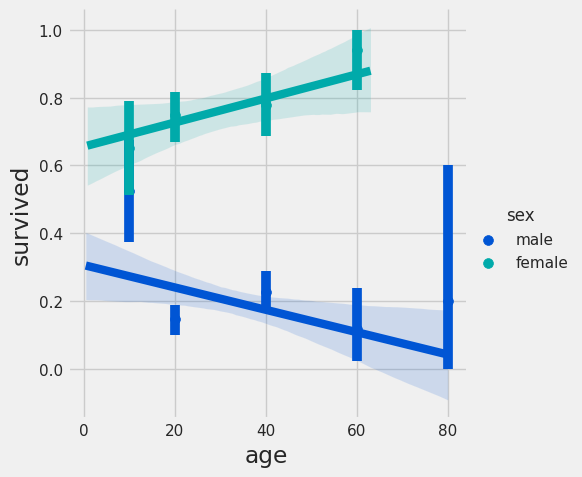

In [430]:
sns.lmplot(x='age', y='survived', hue='sex', data=titanic_df, palette='winter', x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

    1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    2.) Did having a family member increase the odds of surviving the crash?

## References:
- [Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)